In [1]:
import GEOparse

gse = GEOparse.get_GEO(geo="GSE29505")

25-Feb-2024 18:04:52 DEBUG utils - Directory ./ already exists. Skipping.
25-Feb-2024 18:04:52 INFO GEOparse - File already exist: using local version.
25-Feb-2024 18:04:52 INFO GEOparse - Parsing ./GSE29505_family.soft.gz: 
25-Feb-2024 18:04:52 DEBUG GEOparse - DATABASE: GeoMiame
25-Feb-2024 18:04:52 DEBUG GEOparse - SERIES: GSE29505
25-Feb-2024 18:04:52 DEBUG GEOparse - PLATFORM: GPL13645
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730227
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730228
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730229
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730230
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730231
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730232
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730233
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730234
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730235
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: GSM730236
25-Feb-2024 18:04:52 DEBUG GEOparse - SAMPLE: 

In [2]:
gse.gpls['GPL13645'].table

ID CHROMOSOME      RANGE_GB  \
0    a_cg00032774-61          9  NC_000009.10   
1    a_cg00044871-61         13   NC_000013.9   
2    a_cg00131470-61          5   NC_000005.8   
3    a_cg00205286-61          5   NC_000005.8   
4    a_cg00248810-61         19   NC_000019.8   
..               ...        ...           ...   
379  a_cg26942425-61          7  NC_000007.12   
380  a_cg27177477-61         14   NC_000014.7   
381  a_cg27313941-61          7  NC_000007.12   
382  a_cg27339120-61         11   NC_000011.8   
383  a_cg27373565-61          8   NC_000008.9   

                                              SEQUENCE  REFSEQ  \
0    TCATGCCCTATTCTGTCCTAGAATCTA[CG]GCAGCGCCCCTACAG...    36.1   
1    GGCTGGGCACGGAAGAACAGAAACTG[CG]AAAAGAAAGGGACTGGATG    36.1   
2    CCAAATTTCAACACTTAACTC[CG]AATGTAATCGTCTTCCTTCAA...    36.1   
3    ATACAGCTCAGCTCCAGGCAGG[CG]ATGCGGGTTCCCAATGCGGG...    36.1   
4    ACCTCTGCCCCCTCACTT[CG]CATGATCAGAGCCTCTCAACTTCA...    36.1   
..                                                 ...     ...   
379  GATGGGTTGTGTGGCACATGCATAAACA[CG]CATGTATGTGGTTT...    36.1   
380  GGAGAGAGGCTGCTGCTAGAAGCAACCAA[CG]GAGAGCAACAAGT...    36.1   
381  TTGGGAAGCAAAGGGTATTTATCAGTGA[CG]CAGTGCAAAAGGCC...    36.1   
382  AGGAAATACACAGGAAGGAGGTGGCAA[CG]GGTGGGAAGCCACTA...    36.1   
383  GGAGACTAACTCCTGAGGGATAAGGT[CG]CTCTGAAAGTCACAAG...    36.1   

     CPG_COORDINATE  RANGE_START  RANGE_END    OCGI            CG_NO  
0          97306736     97306709   97306760   shore  a_cg00032774-61  
1          24843811     24843785   24843831   shore  a_cg00044871-61  
2          11955257     11955236   11955286   shore  a_cg00131470-61  
3         158466256    158466234  158466283  island  a_cg00205286-61  
4           4505352      4505334    4505381   shore  a_cg00248810-61  
..              ...          ...        ...     ...              ...  
379       149667379    149667351  149667405   shore  a_cg26942425-61  
380        52326664     52326635   52326692   shore  a_cg27177477-61  
381        27153079     27153051   27153103   shore  a_cg27313941-61  
382         2243970      2243943    2243993   shore  a_cg27339120-61  
383       132985112    132985086  132985140   shore  a_cg27373565-61  

[384 rows x 10 columns]

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
get_values = lambda v: (v[0], v[1].table["VALUE"])
data = dict(map(get_values, gse.gsms.items()))
data_matrix = pd.DataFrame(data).to_numpy()
# fig, ax = plt.subplots(figsize=(10, 8), dpi=200)
# ax.matshow(data_matrix)
# plt.show()
data_matrix

array([[0.85011442, 0.91384726, 0.87196807, ..., 0.35131031, 0.9062418 ,
        0.38343231],
       [0.21971657, 0.27562308, 0.2972844 , ..., 0.28089555, 0.32190621,
        0.3331264 ],
       [0.6610407 , 0.69715801, 0.73897695, ..., 0.76701423, 0.56995778,
        0.80866877],
       ...,
       [0.64970272, 0.56342395, 0.63646312, ..., 0.15605532, 0.65956994,
        0.18817276],
       [0.49208619, 0.83020746, 0.65321445, ..., 0.72228062, 0.49091475,
        0.67601061],
       [0.3486858 , 0.69183198, 0.49430472, ..., 0.52227128, 0.68871934,
        0.60593163]])

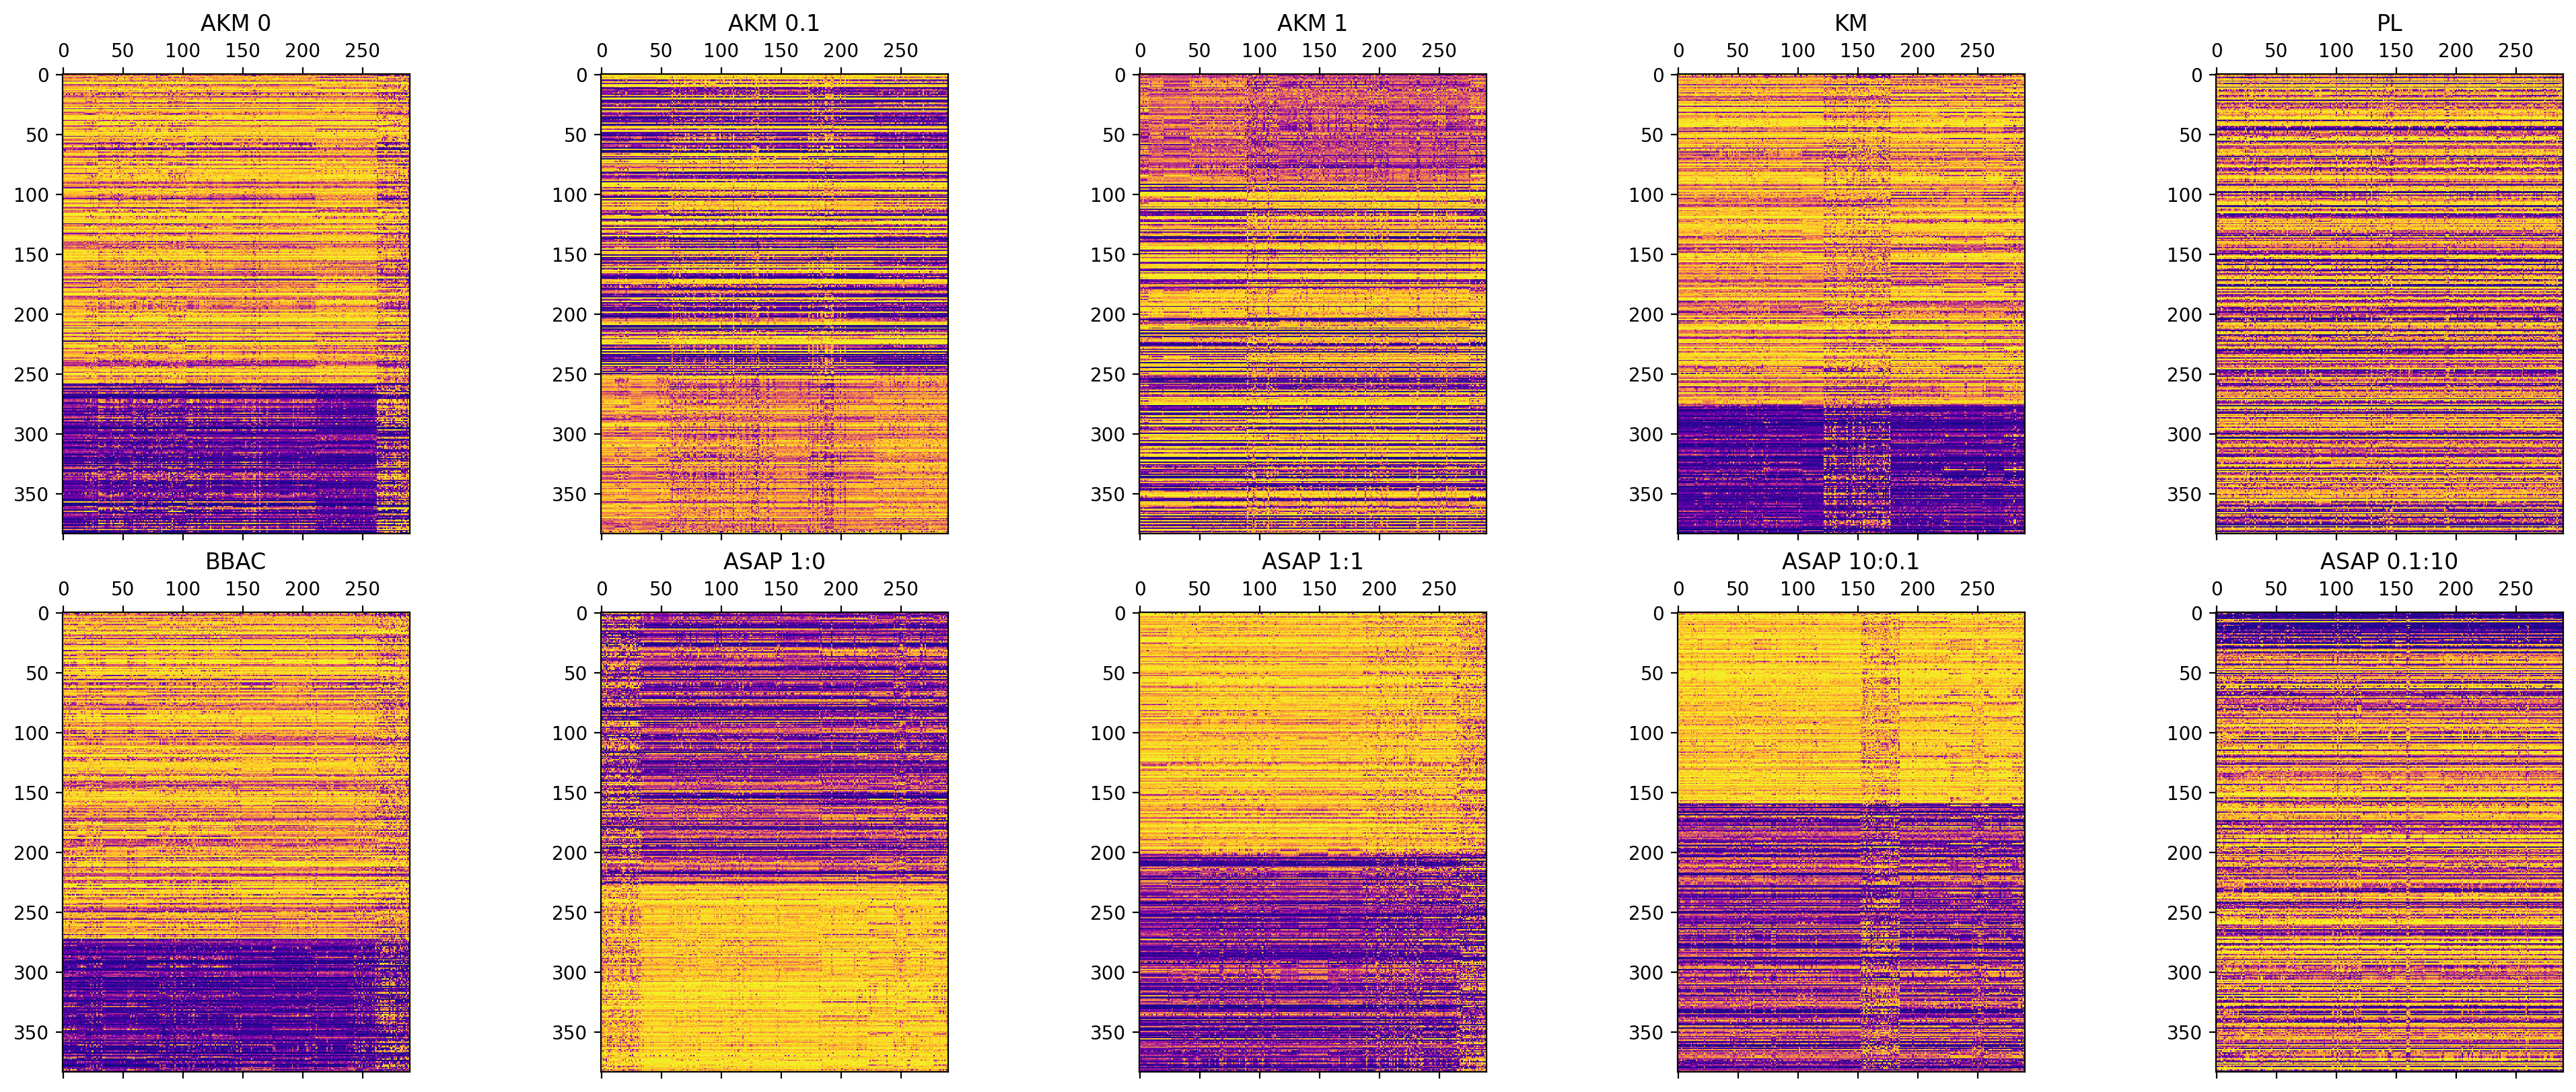

In [6]:
from run import show_real

show_real(data_matrix, 3, n_runs_per_simulation=5)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_biclusters
from sklearn.metrics import consensus_score

from generate import make_biclusters_simulation

b = .3
# data, rows, columns = make_biclusters_simulation(
#     shape=(100, 100),
#     M=np.array([[1, 0], [0, 1]]),
#     S=np.array([[1. + b, 1.], [1., 1. + b]]),
#     n_clusters=2,
#     sizes=np.array([0.3, 0.7])
# )

data_matrix = pd.DataFrame(data).to_numpy()

plt.matshow(data_matrix)
plt.title("Original dataset")
# 
# # shuffle clusters
# rng = np.random.RandomState(0)
# row_idx = rng.permutation(data.shape[0])
# col_idx = rng.permutation(data.shape[1])
# data = data[row_idx][:, col_idx]

# plt.matshow(data, cmap=plt.cm.Blues)
# plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=2, random_state=0)
model.fit(data_matrix)
# score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

# print("consensus score: {:.3f}".format(score))

fit_data = data_matrix[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [ ]:
import numpy as np
# 
# n_items = 10
# n_clusters = 2
# vector = np.random.randint(0 ,2, n_items)
# labels = np.random.randint(0 ,n_clusters, n_items)
# 
# sums = np.array([np.sum(vector[np.where(labels == i)]) for i in range(n_clusters)])
# counts = np.array([np.count_nonzero(labels == i) for i in range(n_clusters)])
# 
# print(vector)
# print(labels)
# print(sums)
# print(counts)

# a = np.array([[1, 2], [3, 4]])
# b = np.array([[1, 10], [3, 4]])
# a / b

# a = np.array([[1, 2], [3, 4]])
# np.sum(a, axis=1) / 3

from utils import get_submatrix_from_labels

# X = np.array([[1,2], [3,4]])
# row_labels = np.array([1,2])
# col_labels = np.array([1,2])
# # get_submatrix_from_labels(X, row_labels, col_labels, 3, 1)
# np.argmin([1,2,-1.1])

# np.argmax(np.random.multinomial(1, np.repeat(1.0 / 3, 3)))
# a = np.array([1,2,3])
# inv = 1 / a
# inv / np.sum(inv)

np.random.rand()

In [ ]:
# import numpy as np
# from matplotlib import pyplot as plt
# from algorithms import profile_likelihood
# from generate import make_biclusters_simulation
# from typing import Tuple
# from sklearn.metrics import consensus_score
# from utils import run_n_times, get_biclusters_from_labels
# 
# def show(shape: Tuple[int, int], n_clusters: int, n_runs: int):
#     fig, (ax1, ax2, ax3) = plt.subplots(
#         1, 3, figsize=(11, 4), layout='constrained', dpi=200)
# 
#     # generate data matrix with cluster assignments
#     # data, rows, cols = make_biclusters(
#     #     shape=shape, n_clusters=n_clusters, noise=noise, shuffle=False)
# 
#     data, rows, cols = make_biclusters_simulation(
#         shape=shape,
#         M=np.array([[1., 0], [0, 1.]]),
#         S=np.array([[.7, 1.3], [1.3, .7]]),
#         n_clusters=2,
#         sizes=np.array([.3, .7])
#     )
# 
#     # b = .5
#     # data, rows, cols = make_biclusters_simulation(
#     #     shape=shape,
#     #     M=b * np.array([[.36, .90], [-.58, -.06]]),
#     #     S=np.array([[1. + b, 1.], [1., 1. + b]]),
#     #     n_clusters=2,
#     #     sizes=np.array([.3, .7])
#     # )
# 
#     # show original dataset with visible clusters
#     ax1.matshow(data, cmap=plt.cm.Reds)
#     ax1.set_title("Original dataset")
# 
#     # shuffle data
#     rng = np.random.RandomState(0)
#     row_idx = rng.permutation(data.shape[0])
#     col_idx = rng.permutation(data.shape[1])
#     data = data[row_idx][:, col_idx]
# 
#     # show shuffled data
#     ax2.matshow(data, cmap=plt.cm.Reds)
#     ax2.set_title("Shuffled dataset")
# 
# 
#     row_labels, col_labels = run_n_times(
#         algorithm=profile_likelihood.profile_likelihood_biclustering,
#         args={
#             "data_matrix": data,
#             "n_clusters": 2,
#         },
#         n_runs=n_runs
#     )
# 
#     # reorder rows and cols of a data matrix to show clusters
#     fit_data = data[np.argsort(row_labels)]
#     fit_data = fit_data[:, np.argsort(col_labels)]
# 
#     # show data matrix with reordered rows and cols according to calculated cluster assignments
#     ax3.matshow(fit_data, cmap=plt.cm.Reds)
#     ax3.set_title(f"Profile Likelihood Biclustering")
# 
#     # calculate consensus score between expected and actual biclusters
#     score = consensus_score(get_biclusters_from_labels(shape, n_clusters, row_labels, col_labels),
#                             (rows[:, row_idx], cols[:, col_idx]))
# 
#     print(f"Consensus Score: {score:.3f}")
# 
#     plt.show()
# 
# show(
#     shape=(50, 50),
#     n_clusters=3,
#     n_runs=5
# )

In [ ]:
from typing import Literal

# class Assignment:
#     def __init__(self, type: Literal['row', 'col', 'blank'], to_cluster_idx: int = 0, criterion_eval: float = 0.):
#         self.type = type
#         self.to_cluster_idx = to_cluster_idx
#         self.criterion_eval = criterion_eval

dtype = [('type', 'S3'), ('to_cluster_idx', int), ('criterion_eval', float)]

assignment_list = []
for i in range(10):
    assignment_list.append(('row' if np.random.rand() > 0.5 else 'col', 4, np.random.rand() * 10))

a = np.array(assignment_list, dtype=dtype)

np.flip(np.sort(a, order=['criterion_eval'], kind='quicksort'))

In [ ]:
def f():
    return 1, 2, 3, 4


a, b, c = f()

In [ ]:
%%time
for i in range(int(1e8)):
    continue

In [ ]:
%%time
for i in np.nditer(np.arange(int(1e8))):
    continue

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_biclusters, make_checkerboard
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

from tqdm import trange

from typing import Literal, Tuple, Callable, Dict
from numpy.typing import NDArray

from utils import get_biclusters_from_labels
from generate import make_checkerboard_with_custom_distribution, Distribution


### Types of Data-Matrices

In [ ]:
shape = (300, 300)
n_clusters = 5
noise = 10

fig, axes = plt.subplots(1, 4, figsize=(12, 7), layout='constrained', dpi=200)

data_matrices = []

for d in Distribution:
    data, _, _ = make_checkerboard_with_custom_distribution(
        shape=shape, n_clusters=n_clusters, noise=noise, distribution=d)
    data_matrices.append(data)

for d, i in zip(Distribution, range(len(Distribution))):
    axes[i].matshow(data_matrices[i], cmap=plt.cm.Blues)
    axes[i].set_title(f"{d}")

plt.show()


### Algorithms

In [ ]:
def biclustering_wrapper(
        X: NDArray,
        n_clusters: int,
        type: Literal['biclusters', 'checkerboard'],
        metric_name: Literal['euclidian', 'kullback-leibler'],
        EM: Callable,
        *,
        repeat=15,
        verbose=True
) -> tuple[NDArray, NDArray]:
    n_rows = X.shape[0]
    n_cols = X.shape[1]

    # calculate weigths as 1 / sigma, where sigma is standard deviation from col mean values
    w = 1. / np.array([np.sqrt(np.sum(np.square(X.T[j] - np.mean(X.T[j]))) / (n_rows - 1)) for j in range(n_cols)])

    def d_euc(x: NDArray, y: NDArray) -> float:
        return np.mean(np.square(x - y) * w)

    def d_kl(x: NDArray, y: NDArray) -> float:
        p = x
        q = y
        return np.sum(p * np.log(p / q)) - np.sum(p) + np.sum(q)

    if metric_name == "euclidian":
        metric = d_euc
    elif metric_name == "kullback-leibler":
        metric = d_kl

    min_row_loss, final_row_labels = EM(X, n_clusters, metric)

    if verbose:
        row_trange = trange(
            repeat - 1, desc=f'Row Loss: {min_row_loss:.3f}', leave=True)
    else:
        row_trange = range(repeat - 1)

    for _ in row_trange:

        row_loss, row_labels = EM(X, n_clusters, metric)

        if row_loss < min_row_loss:
            min_row_loss, final_row_labels = row_loss, row_labels

        if verbose:
            row_trange.set_description(
                f'Row Loss: {min_row_loss:.3f}', refresh=True)

    # compress X along 0 axis accordint to row labels
    comp_X = np.array([np.mean(X[np.where(final_row_labels == i)], axis=0)
                       for i in range(n_clusters) if np.where(final_row_labels == i)[0].size > 0])

    if comp_X.shape[0] < n_clusters:  # attempt is failed: not all clusters filled
        return final_row_labels, np.random.randint(0, n_clusters, n_cols)

    # transpose compressed matrix
    comp_X = comp_X.T

    # recalculate weights
    w = 1. / np.array(
        [np.sqrt(np.sum(np.square(comp_X.T[j] - np.mean(comp_X.T[j]))) / (n_cols - 1)) for j in range(n_clusters)])

    min_col_loss, final_col_labels = EM(comp_X, n_clusters, metric)

    if verbose:
        col_trange = trange(
            repeat - 1, desc=f'Col Loss: {min_row_loss:.3f}', leave=True)
    else:
        col_trange = range(repeat - 1)

    for _ in col_trange:

        col_loss, col_labels = EM(comp_X, n_clusters, metric)

        if col_loss < min_col_loss:
            min_col_loss, final_col_labels = col_loss, col_labels

        if verbose:
            col_trange.set_description(
                f'Col Loss: {min_col_loss:.3f}', refresh=True)

    # reorder row labels to look cool
    if type == "biclusters":

        cluster_blocks = np.zeros((n_clusters, n_clusters))
        cluster_counts = np.zeros((n_clusters, n_clusters), dtype=np.int32)
        for i in range(n_rows):
            for j in range(n_cols):
                cluster_blocks[final_row_labels[i]
                ][final_col_labels[j]] += data[i][j]
                cluster_counts[final_row_labels[i]][final_col_labels[j]] += 1
        for i in range(n_clusters):
            for j in range(n_clusters):
                if cluster_counts[i][j] != 0:
                    cluster_blocks[i][j] /= cluster_counts[i][j]

        reordered_row_labels = np.array(
            [np.argmax(row) for row in cluster_blocks])
        reorder = np.vectorize(lambda i: reordered_row_labels[i])
        final_row_labels = reorder(final_row_labels)

    return final_row_labels, final_col_labels


In [ ]:
def raw_EM(X: NDArray, n_clusters: int, metric: Callable, eps=1.e-8) -> tuple[float, NDArray]:
    def calc_loss(X: NDArray, labels: NDArray, centroids: NDArray) -> float:
        return np.mean([metric(X[i], centroids[labels[i]]) for i in range(labels.size)])

    def expectation_step(X: NDArray, centroids: NDArray) -> NDArray:
        n_rows = X.shape[0]
        labels = np.zeros(n_rows, dtype=np.int32)
        for i in range(n_rows):
            labels[i] = np.argmin([metric(X[i], centroid)
                                   for centroid in centroids])
        return labels

    def maximization_step(X: NDArray, labels: NDArray, n_clusters: int) -> NDArray:
        n_rows = X.shape[0]
        n_cols = X.shape[1]
        centroids = np.zeros((n_clusters, n_cols))
        labels_count = np.zeros(n_clusters)
        for i in range(n_rows):
            centroids[labels[i]] += X[i]
            labels_count[labels[i]] += 1
        for i in range(n_clusters):
            if labels_count[i] > 0:
                centroids[i] /= labels_count[i]
            else:
                centroids[i] = X[np.random.randint(n_rows)]
        return centroids

    n_rows = X.shape[0]
    labels = np.random.randint(0, n_clusters, size=n_rows)
    centroids = maximization_step(X, labels, n_clusters)
    prev_loss = calc_loss(X, labels, centroids) + 1.
    loss = prev_loss - 1.

    while prev_loss - loss > eps:
        labels = expectation_step(X, centroids)
        centroids = maximization_step(X, labels, n_clusters)
        loss, prev_loss = calc_loss(X, labels, centroids), loss

    return loss, labels

In [ ]:
def soft_EM(X: NDArray, n_clusters: int, metric: Callable, eps=1.e-8) -> tuple[float, NDArray]:
    def calc_loss(X: NDArray, prob_list: NDArray, mu: NDArray) -> float:
        return np.mean([metric(X[i], mu[np.argmax(prob_list[i])]) for i in range(X.shape[0])])

    def generate_centroid(X: NDArray) -> NDArray:
        return X[np.random.randint(0, X.shape[0])]

    def expectation_step(X: NDArray, pi: NDArray, mu: NDArray, n_clusters: int) -> NDArray:
        n_rows = X.shape[0]
        prob_list = np.zeros((n_rows, n_clusters))
        for row_idx in range(n_rows):
            prob = np.zeros(n_clusters)
            for cluster_idx in range(n_clusters):
                prob[cluster_idx] = pi[cluster_idx] * \
                                    np.exp(-metric(X[row_idx], mu[cluster_idx]))
            if np.sum(prob) != 0:
                prob /= np.sum(prob)
            else:
                prob = np.repeat(1., n_clusters) / n_clusters
            prob_list[row_idx] = prob
        return prob_list

    def maximization_step(X: NDArray, prob_list: NDArray, n_clusters: int) -> Tuple[NDArray, NDArray]:
        n_rows = X.shape[0]
        n_cols = X.shape[1]
        mu = np.zeros((n_clusters, n_cols))
        pi = np.zeros(n_clusters)
        for h in range(n_clusters):
            if np.sum(prob_list.T[h]) > 0:
                pi[h] = np.sum(prob_list.T[h]) / n_rows
                mu[h] = np.sum([prob_list[row_idx][h] * X[row_idx]
                                for row_idx in range(n_rows)], axis=0) / (pi[h] * n_rows)
            else:
                pi[h] = 1.
                mu[h] = generate_centroid(X)
        return pi, mu

    n_rows = X.shape[0]
    n_cols = X.shape[1]

    # initialize mu (means) based on a custom function
    mu = np.array([generate_centroid(X) for _ in range(n_clusters)])

    # initialize pi
    pi = np.repeat(1., n_clusters)

    # initialize list of probabilities, where i-th h-th element is the probability of i-th row being assigned to h-th cluster
    prob_list = np.array(
        [np.repeat(1., n_clusters) / n_clusters for _ in range(n_rows)])

    # claclulate initial loss
    prev_loss = calc_loss(X, prob_list, mu) + 1.
    loss = prev_loss - 1.

    while prev_loss - loss > eps:  # until convergence
        # updtae list of probabilities based on pi and mu
        prob_list = expectation_step(X, pi, mu, n_clusters)
        # update pi and mu based on the new list of probabilities
        pi, mu = maximization_step(X, prob_list, n_clusters)
        # calculate and reassign loss
        loss, prev_loss = calc_loss(X, prob_list, mu), loss

    # loss and list of "most likely" labels
    return loss, np.array([np.argmax(prob_list[row_idx]) for row_idx in range(n_rows)])

### Example

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(11, 4), layout='constrained', dpi=200)

shape = (300, 300)
n_clusters = 5
noise = 10
# type: Literal["biclusters", "checkerboard"] = "checkerboard"
metric: Literal['euclidian', 'kullback-leibler'] = "euclidian"
distribution: Literal['uniform', 'poissonian',
'gaussian', 'multinomial'] = 'poissonian'
algorithm_type: Literal['soft', 'raw'] = 'raw'
repeat = 20

if algorithm_type == "soft":
    algorithm = soft_EM
elif algorithm_type == "raw":
    algorithm = raw_EM

# generate data matrix with cluster assignments
data, rows, cols = make_checkerboard_with_custom_distribution(
    shape=shape, n_clusters=n_clusters, noise=noise, distribution=distribution)

# show original dataset with visible clusters
ax1.matshow(data, cmap=plt.cm.Blues)
ax1.set_title("Original dataset")

# shuffle data
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

# show shuffled data
ax2.matshow(data, cmap=plt.cm.Blues)
ax2.set_title("Shuffled dataset")

# calculate cluster assignments using an iterative algorithm
row_labels, col_labels = biclustering_wrapper(
    data, n_clusters, "checkerboard", metric, algorithm, repeat=repeat)

# reorder rows and cols of a data matrix to show clusters
fit_data = data[np.argsort(row_labels)]
fit_data = fit_data[:, np.argsort(col_labels)]

# show data matrix with reordered rows and cols according to calculated cluster assignments
ax3.matshow(fit_data, cmap=plt.cm.Blues)
ax3.set_title(f"EM {algorithm_type.capitalize()} Biclustering")

# calculate soncensus score between expected and actual biclusters
score = consensus_score(get_biclusters_from_labels(shape, n_clusters, row_labels, col_labels),
                        (rows[:, row_idx], cols[:, col_idx]))
score *= n_clusters

print(f"Consensus Score: {score:.3f}")

plt.show()


### Compare

In [ ]:
def try_out_algorithm(
        distribution: Literal["poissonian", "gaussian", "multinomial", "uniform"],
        tests: int,
        *,
        shape=(50, 50),
        n_clusters=5,
        noise=5,
        repeat=5
) -> pd.DataFrame:
    metrics = ["euclidian", "kullback-leibler"]
    algorithms = ["raw", "soft"]

    t = trange(tests, desc=f"{distribution.capitalize()}", leave=True)

    d = {
        "raw": {},
        "soft": {}
    }
    for algorithm in algorithms:
        for metric in metrics:
            d[algorithm][metric] = np.zeros(tests + 1)

    for i in t:
        data, rows, cols = make_checkerboard_with_custom_distribution(shape, n_clusters, noise=noise,
                                                                      distribution=distribution)

        def run(metric: Literal["euclidian", "kullback-leibler"], algorithm: Literal["raw", "soft"]) -> float:
            if algorithm == "raw":
                em = raw_EM
            elif algorithm == "soft":
                em = soft_EM
            row_labels, col_labels = biclustering_wrapper(data, n_clusters, "checkerboard", metric, em, repeat=repeat,
                                                          verbose=False)
            score = consensus_score(get_biclusters_from_labels(shape, n_clusters, row_labels, col_labels),
                                    (rows[:, row_idx], cols[:, col_idx]))
            return score * n_clusters

        rng = np.random.RandomState(0)
        row_idx = rng.permutation(data.shape[0])
        col_idx = rng.permutation(data.shape[1])
        data = data[row_idx][:, col_idx]

        for algorithm in algorithms:
            for metric in metrics:
                d[algorithm][metric][i + 1] = run(metric, algorithm)

    res = {}

    for algorithm in algorithms:
        for metric in metrics:
            d[algorithm][metric][0] = np.mean(d[algorithm][metric][1:])
            metric_alias = ""
            if metric == "euclidian":
                metric_alias = "Euc"
            elif metric == "kullback-leibler":
                metric_alias = "KL"
            leave_3_digits = np.vectorize(lambda x: f"{x:.3f}")
            res[f"({metric_alias}) {algorithm.capitalize()}"] = leave_3_digits(d[algorithm][metric])

    return pd.DataFrame(res, index=["Average"] + [f"Test {i + 1}" for i in range(tests)]).T


In [ ]:
tests = 50
df = try_out_algorithm("poissonian", tests, noise=10)
df

In [ ]:
tests = 50
df = try_out_algorithm("gaussian", tests, noise=10)
df

In [ ]:
tests = 50
df = try_out_algorithm("multinomial", tests, noise=10)
df

In [ ]:
tests = 50
df = try_out_algorithm("uniform", tests, noise=10)
df

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(14, 14), layout='constrained', dpi=200)

shape = (100, 100)
n_clusters = 5
noise = 10
distributions = ['uniform', 'poissonian', 'gaussian', 'multinomial']
repeat = 20

axes[0][0].set_title("Original Dataset")
axes[0][1].set_title("Shuffled Dataset")
axes[0][2].set_title("Raw Biclustering (Euc)")
axes[0][3].set_title("Raw Biclustering (KL)")

for distr_idx in range(len(distributions)):
    data, rows, cols = make_checkerboard_with_custom_distribution(
        shape=shape, n_clusters=n_clusters, noise=noise, distribution=distribution)
    axes[distr_idx][0].matshow(data, cmap=plt.cm.Blues)
    axes[distr_idx][0].set_ylabel(f"{distributions[distr_idx].capitalize()}")

    rng = np.random.RandomState(0)
    row_idx = rng.permutation(data.shape[0])
    col_idx = rng.permutation(data.shape[1])
    data = data[row_idx][:, col_idx]

    axes[distr_idx][1].matshow(data, cmap=plt.cm.Blues)

    euc_row_labels, euc_col_labels = biclustering_wrapper(data, n_clusters, "checkerboard", "euclidian", raw_EM,
                                                          repeat=repeat, verbose=False)
    euc_data = data[np.argsort(euc_row_labels)]
    euc_data = euc_data[:, np.argsort(euc_col_labels)]
    axes[distr_idx][2].matshow(euc_data, cmap=plt.cm.Blues)

    kl_row_labels, kl_col_labels = biclustering_wrapper(data, n_clusters, "checkerboard", "kullback-leibler", raw_EM,
                                                        repeat=repeat, verbose=False)
    kl_data = data[np.argsort(kl_row_labels)]
    kl_data = kl_data[:, np.argsort(kl_col_labels)]
    axes[distr_idx][3].matshow(kl_data, cmap=plt.cm.Blues)

plt.show()


In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(14, 14), layout='constrained', dpi=200)

shape = (300, 300)
n_clusters = 5
noise = 10
distributions = ['uniform', 'poissonian', 'gaussian', 'multinomial']
repeat = 40

axes[0][0].set_title("Original Dataset")
axes[0][1].set_title("Shuffled Dataset")
axes[0][2].set_title("Soft Biclustering (Euc)")
axes[0][3].set_title("Soft Biclustering (KL)")

for distr_idx in range(len(distributions)):
    data, rows, cols = make_checkerboard_with_custom_distribution(
        shape=shape, n_clusters=n_clusters, noise=noise, distribution=distribution)
    axes[distr_idx][0].matshow(data, cmap=plt.cm.Blues)
    axes[distr_idx][0].set_ylabel(f"{distributions[distr_idx].capitalize()}")

    rng = np.random.RandomState(0)
    row_idx = rng.permutation(data.shape[0])
    col_idx = rng.permutation(data.shape[1])
    data = data[row_idx][:, col_idx]

    axes[distr_idx][1].matshow(data, cmap=plt.cm.Blues)

    euc_row_labels, euc_col_labels = biclustering_wrapper(data, n_clusters, "checkerboard", "euclidian", soft_EM,
                                                          repeat=repeat, verbose=False)
    euc_data = data[np.argsort(euc_row_labels)]
    euc_data = euc_data[:, np.argsort(euc_col_labels)]
    axes[distr_idx][2].matshow(euc_data, cmap=plt.cm.Blues)

    kl_row_labels, kl_col_labels = biclustering_wrapper(data, n_clusters, "checkerboard", "kullback-leibler", soft_EM,
                                                        repeat=repeat, verbose=False)
    kl_data = data[np.argsort(kl_row_labels)]
    kl_data = kl_data[:, np.argsort(kl_col_labels)]
    axes[distr_idx][3].matshow(kl_data, cmap=plt.cm.Blues)

plt.show()